In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df=pd.read_excel("C:/Users/nikhi/OneDrive/Documents/Diwali Sales Data.csv.xlsx")

In [17]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [12]:
df.shape

(11243, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11243 entries, 0 to 11242
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11243 non-null  int64  
 1   Cust_name         11243 non-null  object 
 2   Product_ID        11243 non-null  object 
 3   Gender            11243 non-null  object 
 4   Age Group         11243 non-null  object 
 5   Age               11243 non-null  int64  
 6   Marital_Status    11243 non-null  int64  
 7   State             11243 non-null  object 
 8   Zone              11243 non-null  object 
 9   Occupation        11243 non-null  object 
 10  Product_Category  11243 non-null  object 
 11  Orders            11243 non-null  int64  
 12  Amount            11231 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11243 entries, 0 to 11242
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11243 non-null  int64  
 1   Cust_name         11243 non-null  object 
 2   Product_ID        11243 non-null  object 
 3   Gender            11243 non-null  object 
 4   Age Group         11243 non-null  object 
 5   Age               11243 non-null  int64  
 6   Marital_Status    11243 non-null  int64  
 7   State             11243 non-null  object 
 8   Zone              11243 non-null  object 
 9   Occupation        11243 non-null  object 
 10  Product_Category  11243 non-null  object 
 11  Orders            11243 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [19]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [20]:
pd.isnull(df).sum

<bound method DataFrame.sum of        User_ID  Cust_name  Product_ID  Gender  Age Group    Age  \
0        False      False       False   False      False  False   
1        False      False       False   False      False  False   
2        False      False       False   False      False  False   
3        False      False       False   False      False  False   
4        False      False       False   False      False  False   
...        ...        ...         ...     ...        ...    ...   
11238    False      False       False   False      False  False   
11239    False      False       False   False      False  False   
11240    False      False       False   False      False  False   
11241    False      False       False   False      False  False   
11242    False      False       False   False      False  False   

       Marital_Status  State   Zone  Occupation  Product_Category  Orders  \
0               False  False  False       False             False   False   
1         

In [21]:
df.shape

(11243, 13)

In [35]:
df['Amount'] = df['Amount'].fillna(0).astype(int)

In [36]:
df['Amount'].dtypes

dtype('int64')

In [37]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Exploratry Data Anaylsis

### Gender

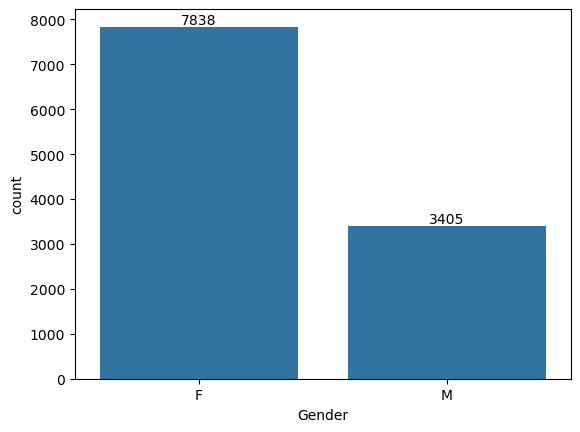

In [51]:
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

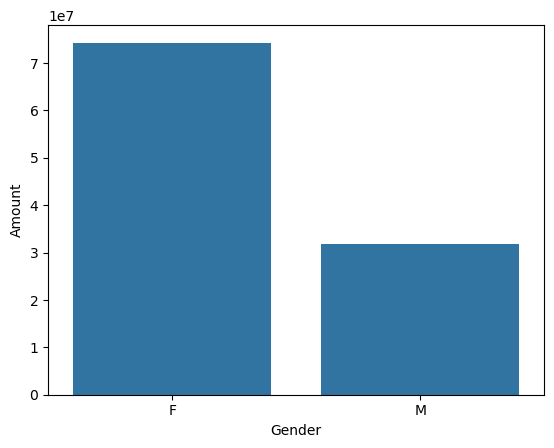

In [53]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

### Age

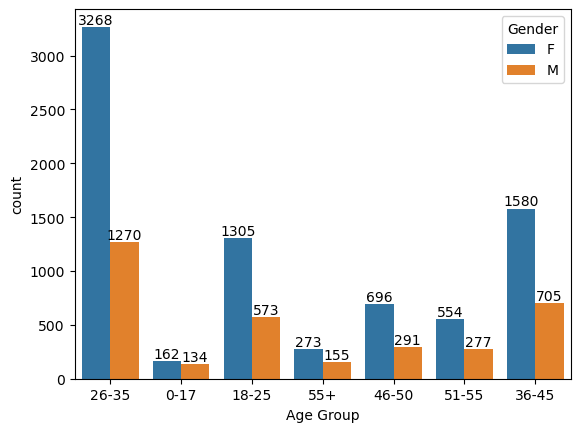

In [56]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

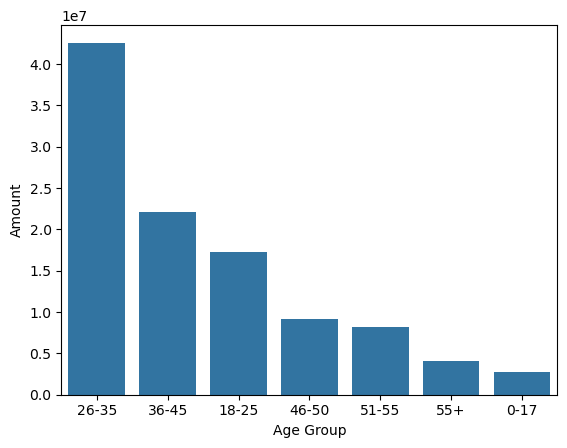

In [57]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

### State

<Axes: xlabel='State', ylabel='Orders'>

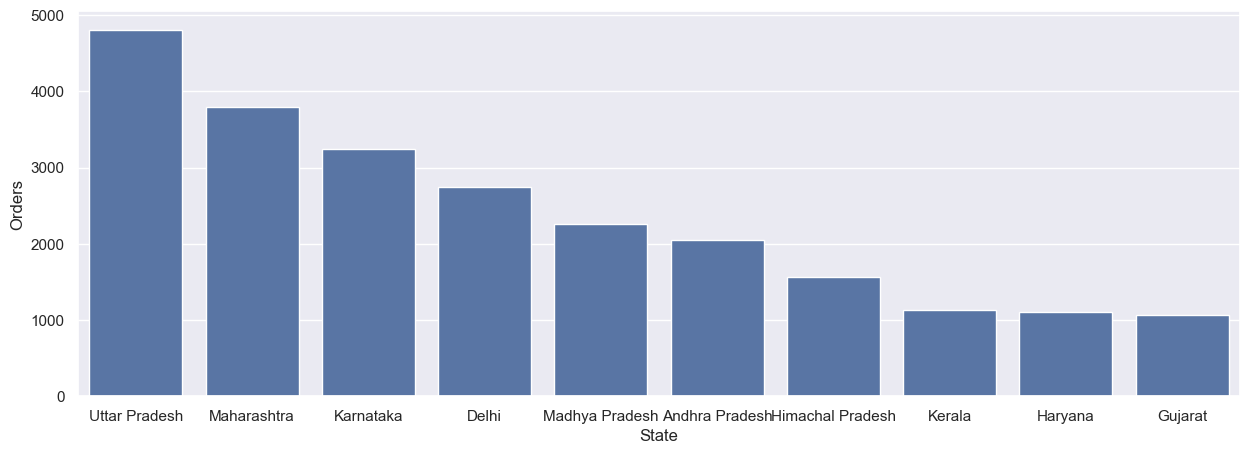

In [58]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

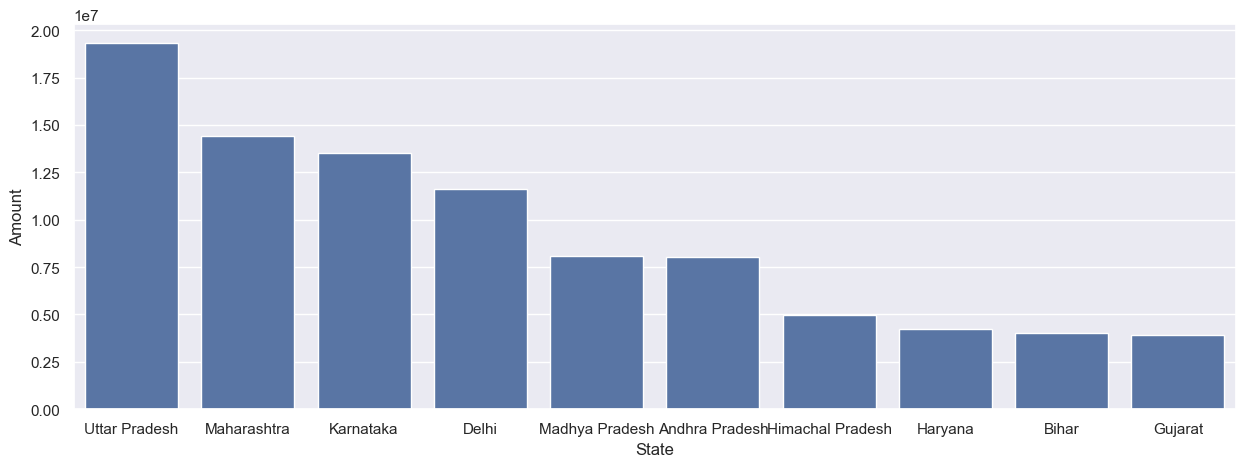

In [59]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

### Maritial Status

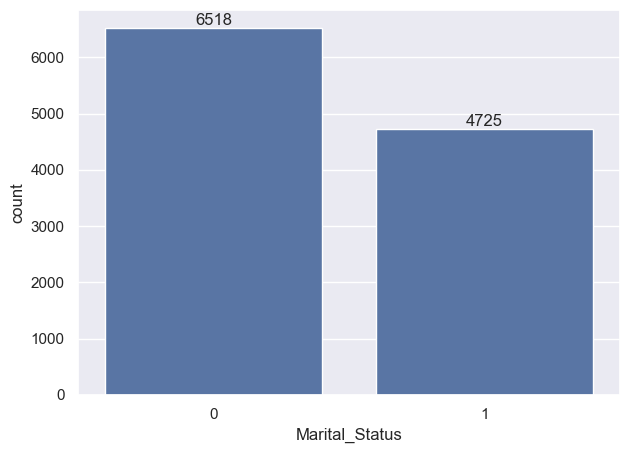

In [71]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

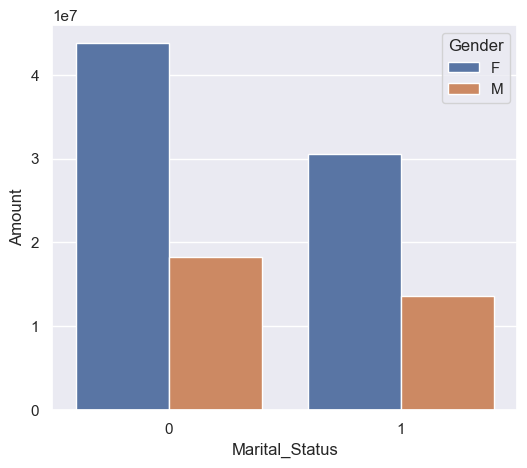

In [61]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

### Occupation

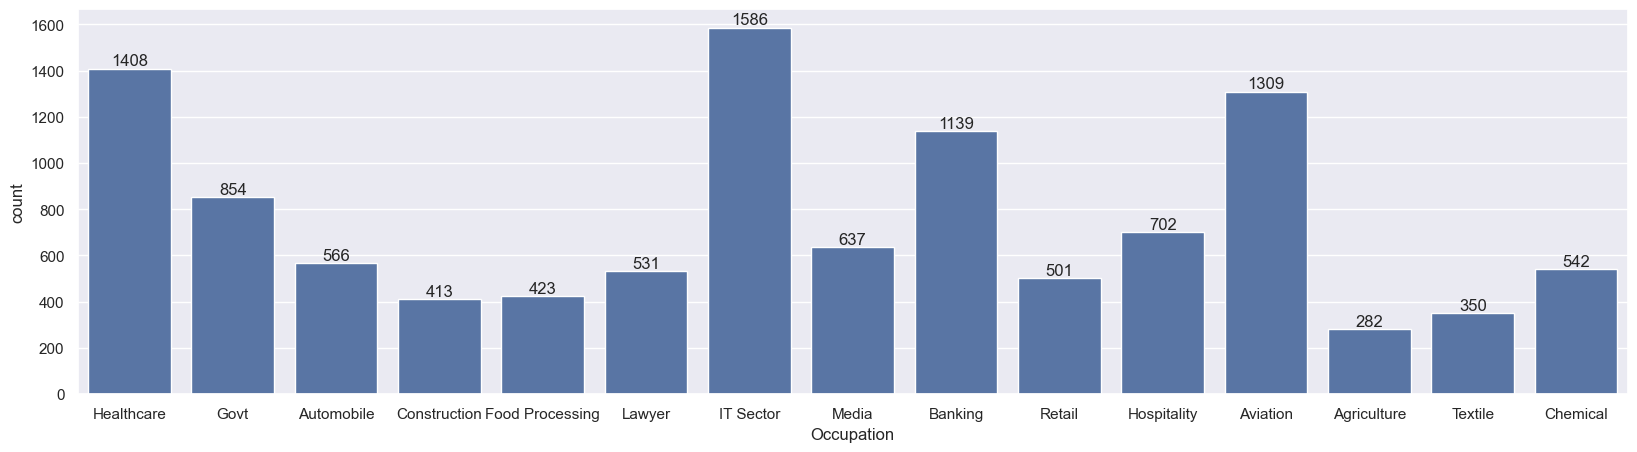

In [63]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

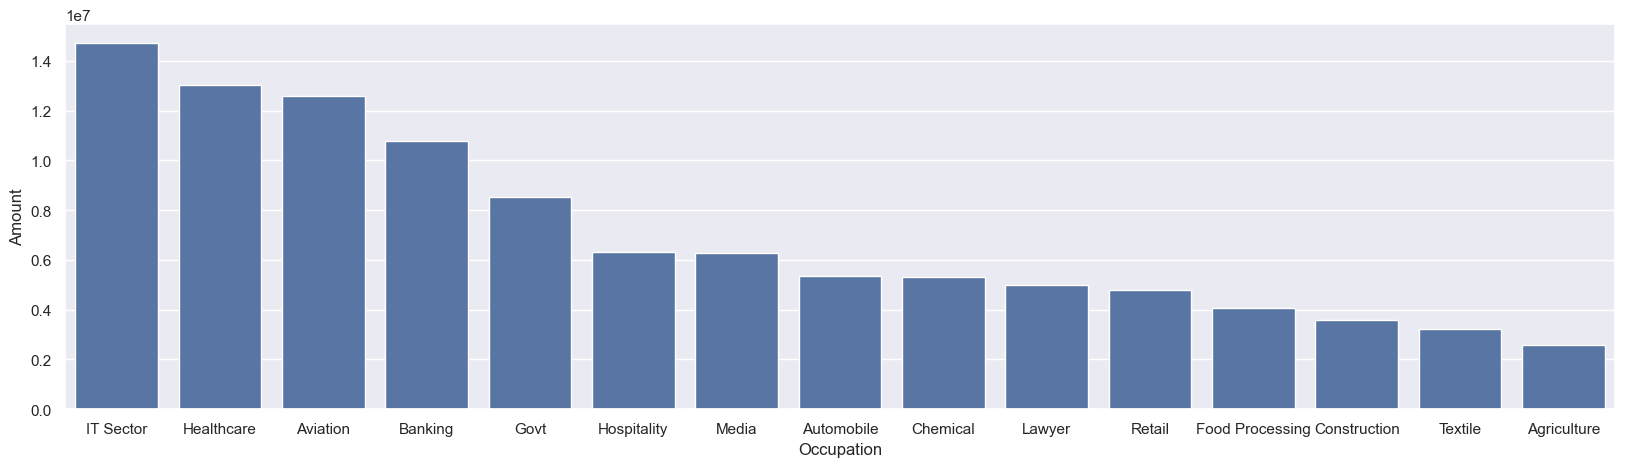

In [64]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

### Product Cateogry

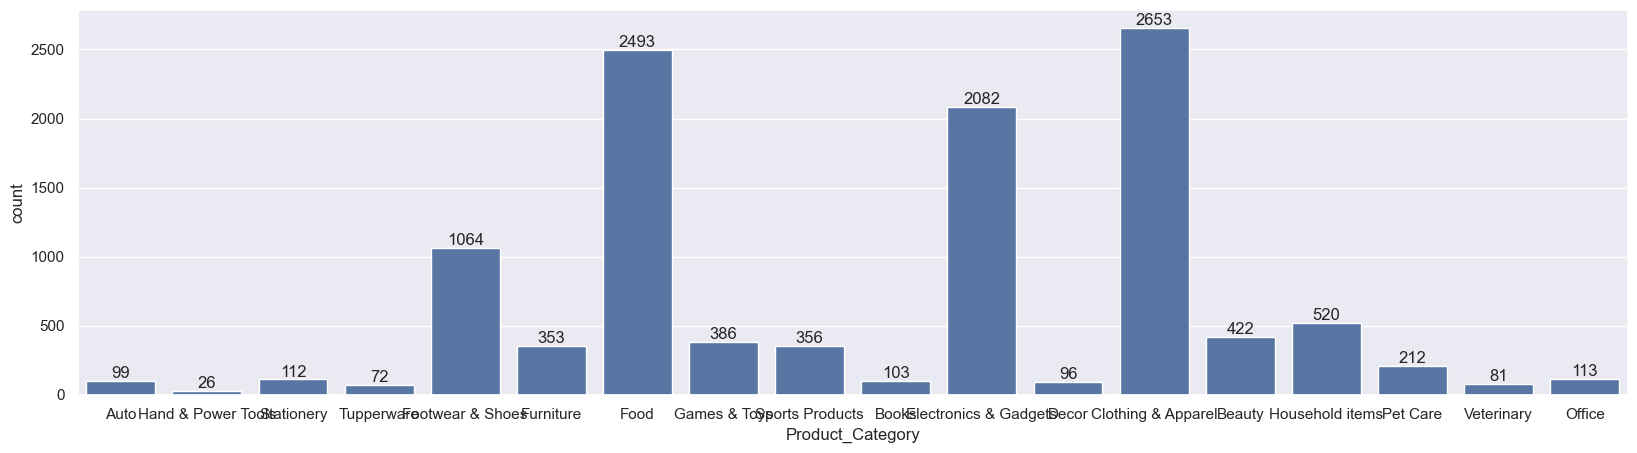

In [65]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

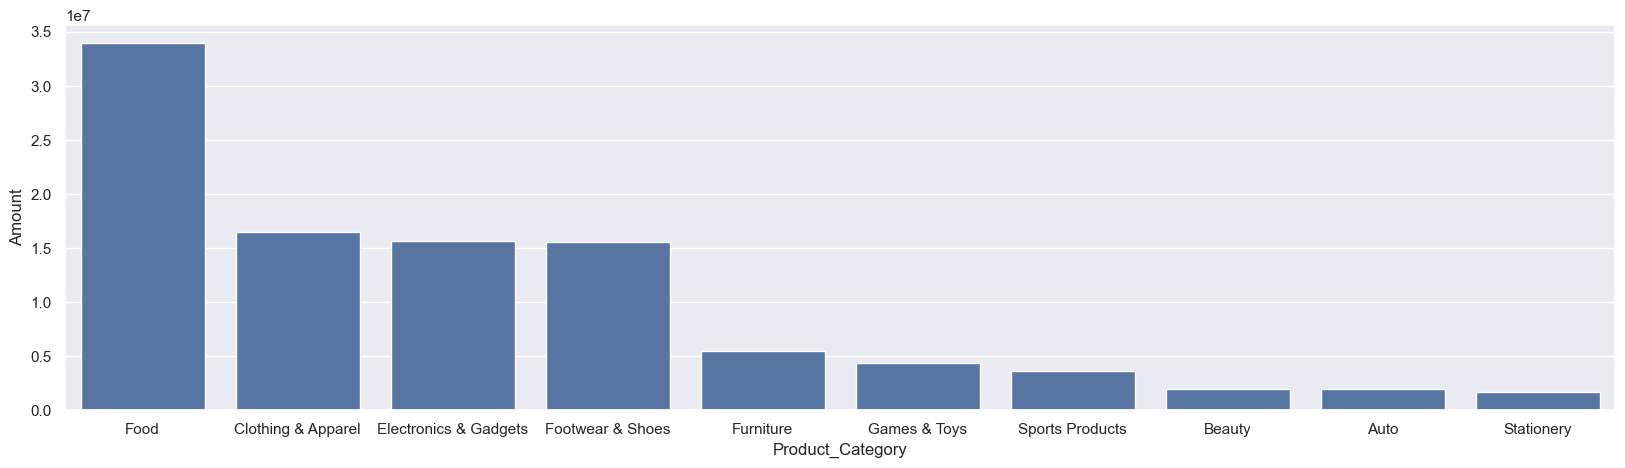

In [66]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

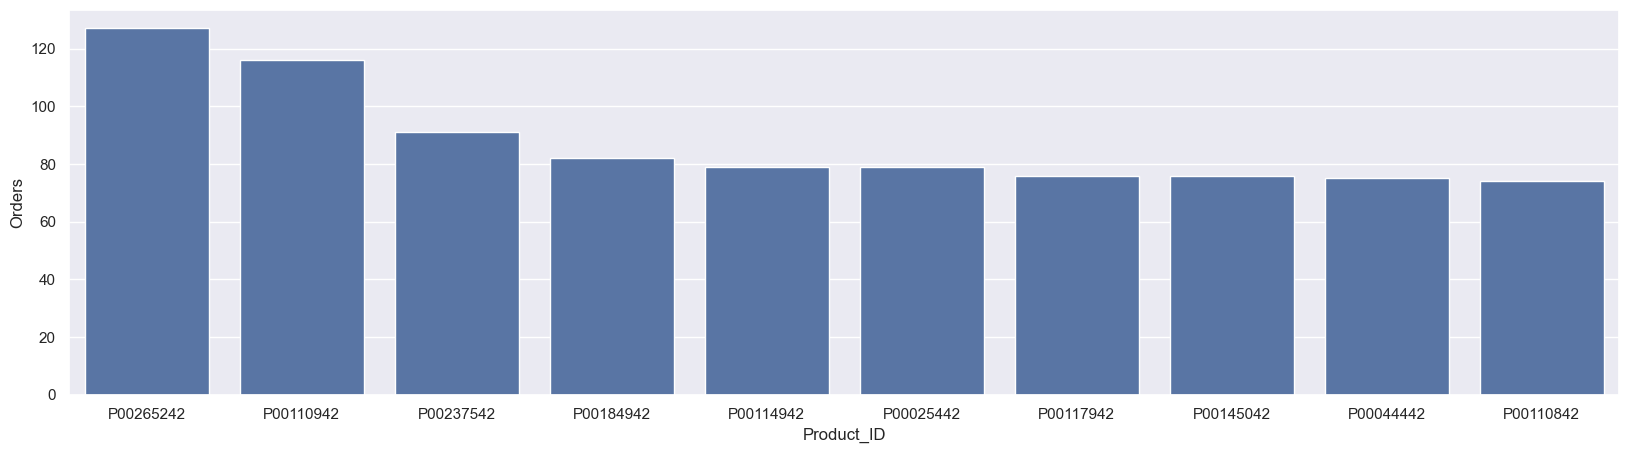

In [67]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

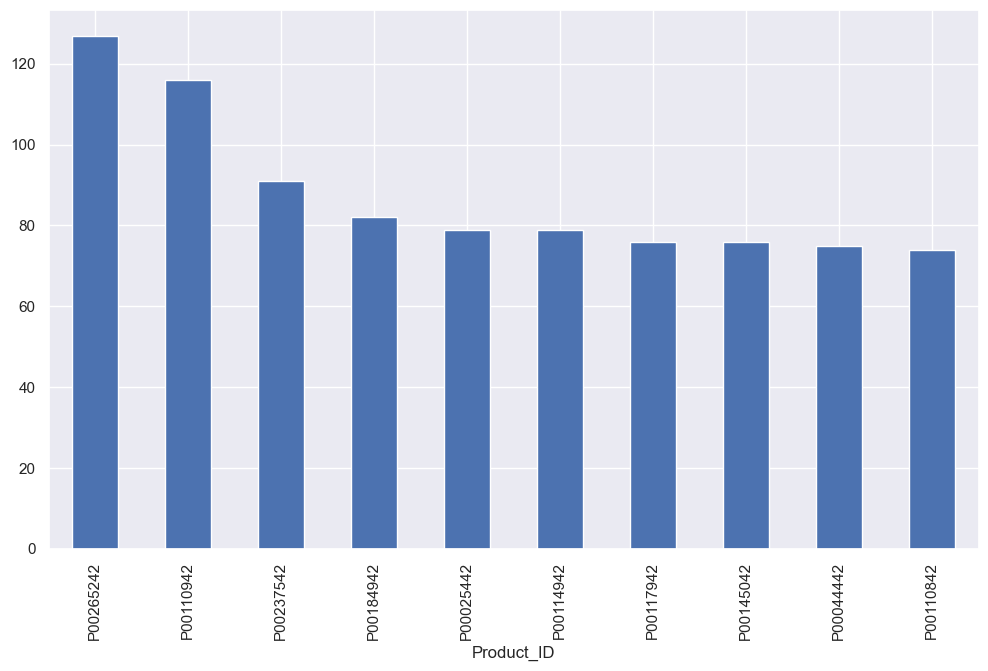

In [68]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

### Conclusion